<h1> HTTP and Requests</h1>


Requests is a Python Library that allows you to send <code>HTTP/1.1</code> requests easily. We can import the library as follows:


In [1]:
import requests

We will also use the following libraries:


In [2]:
import os 
from PIL import Image
from IPython.display import IFrame

You can make a <code>GET</code> request via the method <code>get</code> to [www.google.com](https://www.google.com/):


In [4]:
url='https://www.google.com/'
r=requests.get(url)


We have the response object <code>r</code>, this has information about the request, like the status of the request. We can view the status code using the attribute <code>status_code</code>.


In [5]:
r.status_code

200

You can view the request headers:


In [6]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}


You can view the request body, in the following line, as there is no body for a get request we get a <code>None</code>:


In [7]:
print("request body:", r.request.body)

request body: None


You can view the <code>HTTP</code> response header using the attribute <code>headers</code>. This returns a python dictionary of <code>HTTP</code> response headers.


In [8]:
header=r.headers
print(r.headers)

{'Date': 'Sun, 25 Sep 2022 22:07:04 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2022-09-25-22; expires=Tue, 25-Oct-2022 22:07:04 GMT; path=/; domain=.google.com; Secure, AEC=AakniGNKuavjjY8CbVMWZfi9_ERUYyoL6G_AxDp5ewgaqn_66iKXzHV5Lnc; expires=Fri, 24-Mar-2023 22:07:04 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=GWsdDzhAs_-mFFxaklqPmO1sSd888HIeLDhUeheiIvvxlYIravkgPMY3eg41n9s4BHGgJZmGIOhWrgkRL5supsLk9Kk0dy7YN3Xcbx8tRiRtQsKX8mYQ3MjSsLEG9LaBx6d4V0sclySgPcxH4yej57gT-4B008gWEYUo5uJMWvA; expires=Mon, 27-Mar-2023 22:07:04 GMT; path=/; domain=.google.com; HttpOnly', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000,h3-Q050=":443"; ma=2592000,h3-Q046=":443"; ma=2592000,h3-Q043=":443"; ma=2592000,qu

We can obtain the date the request was sent using the key <code>Date</code>


In [9]:
header['date']

'Sun, 25 Sep 2022 22:07:04 GMT'

<code>Content-Type</code> indicates the type of data:


In [10]:
header['Content-Type']

'text/html; charset=ISO-8859-1'

You can also check the <code>encoding</code>:


In [11]:
 r.encoding

'ISO-8859-1'

As the <code>Content-Type</code> is <code>text/html</code> we can use the attribute <code>text</code> to display the <code>HTML</code> in the body. We can review the first 100 characters:


In [12]:
r.text[0:100]

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content'

You can load other types of data for non-text requests, like images. Consider the URL of the following image:


In [14]:
# Use single quotation marks for defining string
url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROOEfWNs2aiamUzqMWZlGKLJE-H26HjjXXTVw-tvAW&s'

We can make a get request:


In [15]:
r=requests.get(url)

We can look at the response header:


In [16]:
print(r.headers)

{'Accept-Ranges': 'bytes', 'Content-Type': 'image/jpeg', 'Access-Control-Allow-Origin': '*', 'Content-Security-Policy-Report-Only': "require-trusted-types-for 'script'; report-uri https://csp.withgoogle.com/csp/images-tbn", 'Cross-Origin-Resource-Policy': 'cross-origin', 'Cross-Origin-Opener-Policy-Report-Only': 'same-origin; report-to="images-tbn"', 'Report-To': '{"group":"images-tbn","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/images-tbn"}]}', 'Content-Length': '4380', 'Date': 'Sun, 25 Sep 2022 22:10:07 GMT', 'Expires': 'Mon, 25 Sep 2023 22:10:07 GMT', 'Cache-Control': 'public, max-age=31536000', 'Last-Modified': 'Sat, 02 Jul 2022 02:31:27 GMT', 'X-Content-Type-Options': 'nosniff', 'Server': 'sffe', 'X-XSS-Protection': '0', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000,h3-Q050=":443"; ma=2592000,h3-Q046=":443"; ma=2592000,h3-Q043=":443"; ma=2592000,quic=":443"; ma=2592000; v="46,43"'}


We can see the <code>'Content-Type'</code>


In [17]:
r.headers['Content-Type']

'image/jpeg'

An image is a response object that contains the image as a <a href="https://docs.python.org/3/glossary.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01#term-bytes-like-object">bytes-like object</a>. As a result, we must save it using a file object. First, we specify the file path and
name


In [18]:
path=os.path.join(os.getcwd(),'image.png')
path

'/resources/labs/PY0101EN/image.png'

We save the file, in order to access the body of the response we use the attribute <code>content</code> then save it using the <code>open</code> function and write <code>method</code>:


In [19]:
with open(path,'wb') as f:
    f.write(r.content)

We can view the image:


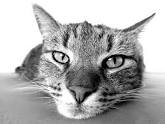

In [20]:
Image.open(path)  

<h2 id="URL_P">Get Request with URL Parameters </h2>


You can use the <b>GET</b> method to modify the results of your query, for example retrieving data from an API. We send a <b>GET</b> request to the  server. Like before we have the <b>Base URL</b>, in the <b>Route</b> we append <code>/get</code>, this indicates we would like to preform a <code>GET</code> request. This is demonstrated in the following table:


The Base URL is for <code>[http://httpbin.org/](http://httpbin.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01)</code> is a simple HTTP Request & Response Service. The <code>URL</code> in Python is given by:


In [21]:
url_get='http://httpbin.org/get'

A <a href="https://en.wikipedia.org/wiki/Query_string?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01">query string</a> is a part of a uniform resource locator (URL), this sends other information to the web server. The start of the query is a <code>?</code>, followed by a series of parameter and value pairs, as shown in the table below. The first parameter name is <code>name</code> and the value is <code>Joseph</code>. The second parameter name is <code>ID</code> and the Value is <code>123</code>. Each pair, parameter, and value is separated by an equals sign, <code>=</code>.
The series of pairs is separated by the ampersand <code>&</code>.


To create a Query string, add a dictionary. The keys are the parameter names and the values are the value of the Query string.


In [22]:
payload={"name":"Joseph","ID":"123"}

Then passing the dictionary <code>payload</code> to the <code>params</code> parameter of the <code> get()</code> function:


In [23]:
r=requests.get(url_get,params=payload)

We can print out the <code>URL</code> and see the name and values


In [24]:
r.url

'http://httpbin.org/get?name=Joseph&ID=123'

There is no request body


In [25]:
print("request body:", r.request.body)

request body: None


We can print out the status code


In [26]:
print(r.status_code)

200


We can view the response as text:


In [27]:
print(r.text)

{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, br", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.28.1", 
    "X-Amzn-Trace-Id": "Root=1-6330d20e-1ded8dfd253fde4310d2e507"
  }, 
  "origin": "169.63.179.135", 
  "url": "http://httpbin.org/get?name=Joseph&ID=123"
}



We can look at the <code>'Content-Type'</code>.


In [28]:
r.headers['Content-Type']

'application/json'

As the content <code>'Content-Type'</code> is in the <code>JSON</code> format we can use the method <code>json()</code>, it returns a Python <code>dict</code>:


In [ ]:
r.json()

The key <code>args</code> has the name and values:


In [ ]:
r.json()['args']

<h2 id="POST">Post Requests  </h2>


Like a <code>GET</code> request, a <code>POST</code> is used to send data to a server, but the <code>POST</code> request sends the data in a request body. In order to send the Post Request in Python, in the <code>URL</code> we change the route to <code>POST</code>:


In [ ]:
url_post='http://httpbin.org/post'

This endpoint will expect data as a file or as a form. A form is convenient way to configure an HTTP request to send data to a server.


To make a <code>POST</code> request we use the <code>post()</code> function, the variable <code>payload</code> is passed to the parameter <code> data </code>:


In [ ]:
r_post=requests.post(url_post,data=payload)

Comparing the URL from the response object of the <code>GET</code> and <code>POST</code> request we see the <code>POST</code> request has no name or value pairs.


In [ ]:
print("POST request URL:",r_post.url )
print("GET request URL:",r.url)

We can compare the <code>POST</code> and <code>GET</code> request body, we see only the <code>POST</code> request has a body:


In [ ]:
print("POST request body:",r_post.request.body)
print("GET request body:",r.request.body)

We can view the form as well:


In [ ]:
r_post.json()['form']